# 1.Working with images 
The main library that manipulates images in python is OpenCV

---

La principale libreria per manipolare immagini in python è OpenCV

## 1.1 OpenCV fundamentals

This notebook covers opening files, looking at pixels, and some simple image processing techniques.

---

Questo notebook tratta l'apertura di file, l'osservazione dei pixel e alcune semplici tecniche di elaborazione delle immagini.

First, we need to import the libraries

---

Come prima cosa, dobbiamo importare le librerie che ci serviranno


In [2]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

Now we can open an image:

---

Apriamo un immagine:

In [3]:
input_image=cv2.imread('imgs_lab/lena_color.jpg')

Print some attributes of the image. How is it represented in our program?

https://www.programiz.com/python-programming/numpy/array-attributes

---

Stampa qualche attributo della nostra variabile _input image_

https://www.programiz.com/python-programming/numpy/array-attributes

Let's show our image. Since we haven't modified it, it should look the same as above.

---

Mostriamo la nostra immagine.
Dato che non l'abbiamo modificata, dovrebbe apparire uguale a quella mostrata sopra.

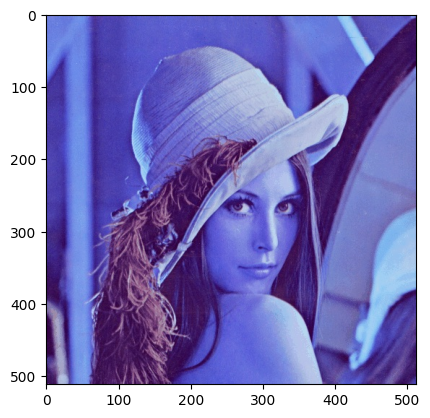

In [4]:
plt.imshow(input_image)

What this illustrates is something key about OpenCV: it doesn't store images in RGB format, but in BGR format.

---

Quello che questo illustra è un aspetto fondamentale di OpenCV: non memorizza le immagini nel formato RGB, ma nel formato BGR.

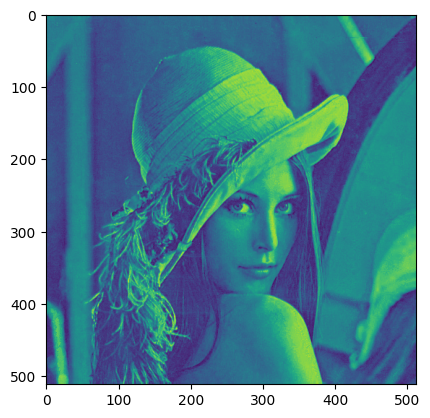

In [5]:
# split channels
b,g,r=cv2.split(input_image)
# show one of the channels (this is red - try the other colors)
plt.imshow(b)

We can merge the channels in the right order to get the original image

---

Possiamo unire i canali nell'ordine corretto per ottenere l'immagine originale.

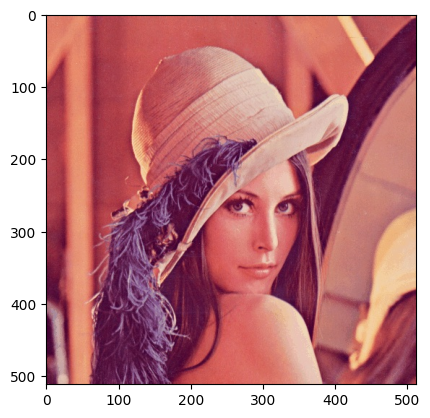

In [6]:
merged=cv2.merge([r,g,b])
# merge takes an array of single channel matrices
plt.imshow(merged)


OpenCV has a function that automatically does that

---

In OpenCV c'è una funzione che lo fa automaticamente

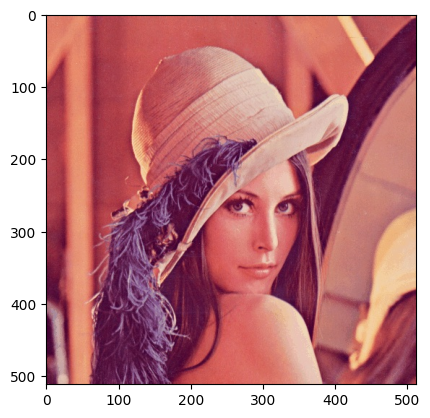

In [7]:
opencv_merged=cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(opencv_merged)

### ?.1.1 Exercise
Load another image from the folder 'imgs_lab' and print it.
Print also its shape, is it the same of the other image?

---

Carica un'altra immagine dalla cartella 'imgs_lab' e stampala.
Stampa anche la sua shape: è la stessa dell'altra immagine?

## 1.2 Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimised for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

---

## 1.2 Ottenere e impostare i dati di un'immagine
Le immagini in Python OpenCV sono array di numpy.
Gli array numpy sono ottimizzati per operazioni veloci sugli array, quindi di solito ci sono metodi rapidi per fare calcoli sugli array senza dover scrivere tutti i dettagli manualmente.
Per questo, è generalmente una cattiva pratica accedere ai singoli pixel, ma è comunque possibile farlo.

(190, 280, 3)


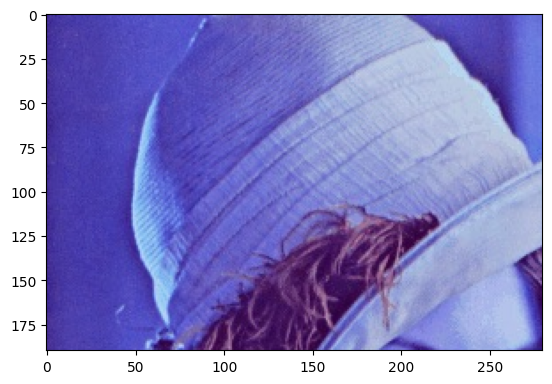

In [8]:
hat = input_image[60:250, 70:350]
plt.imshow(hat)
print(hat.shape)

### ?.3.1 Exercise
Replace an area of the picture input_image with the hat above

---

Sostituisci un'area dell'immagine input_image con il cappello mostrato sopra.

### ?.3.2 Exercise
Enanche brightness and contrast 
(see. https://www.tutorialspoint.com/how-to-change-the-contrast-and-brightness-of-an-image-using-opencv-in-python )

---

Migliora la luminosità e il contrasto.
(vedi. https://www.tutorialspoint.com/how-to-change-the-contrast-and-brightness-of-an-image-using-opencv-in-python )



## Other image manipulation techniques(Advanced)
First, we load the test image and the libraries

---

Altre tecniche per manipolare immagini (Avanzato)
Per prima cosa, carichiamo l'immagine di test e le librerie.



In [9]:
# these imports let you use opencv
import cv2 #opencv itself
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

input_image=cv2.imread('imgs_lab/lena_color.jpg')

### Basic manipulations

Rotate, flip...

---

### Manipolazioni di base

Rotazioni, capovolgimento

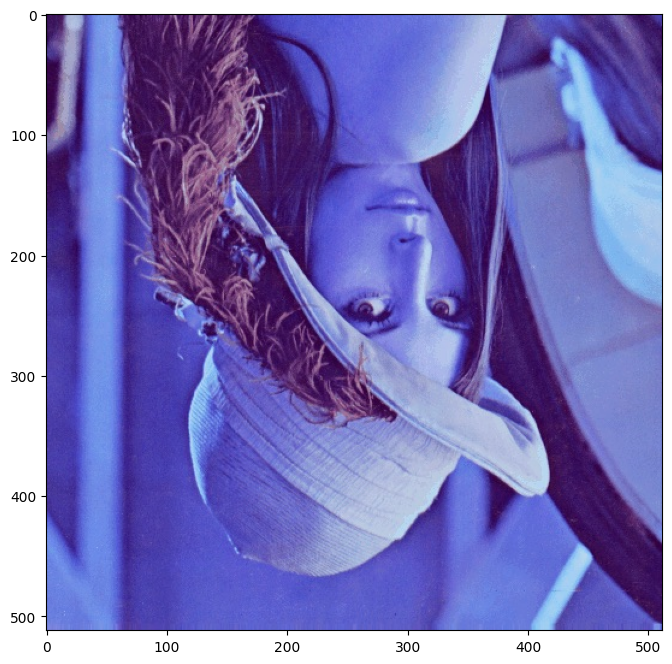

In [10]:
flipped_code_0=cv2.flip(input_image,0) # vertical flip
plt.imshow(flipped_code_0)
#plt.imshow(np.rot90(input_image, 2))

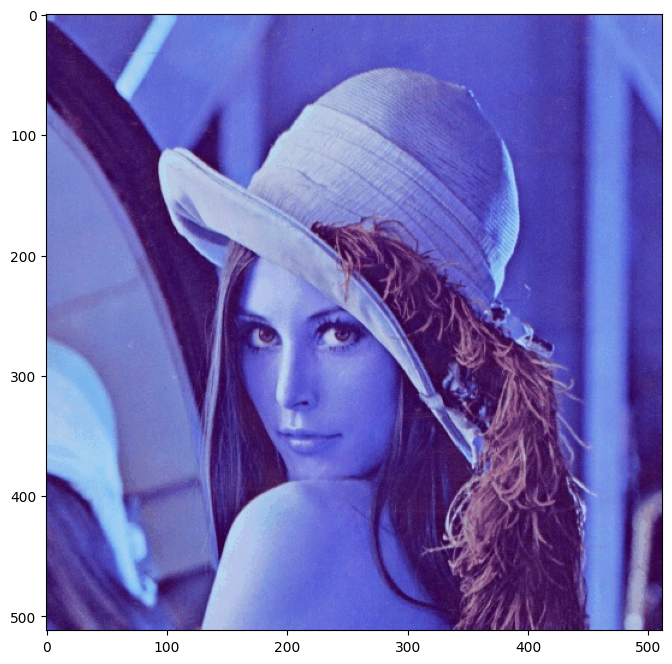

In [11]:
flipped_code_1=cv2.flip(input_image,1) # horizontal flip
plt.imshow(flipped_code_1)

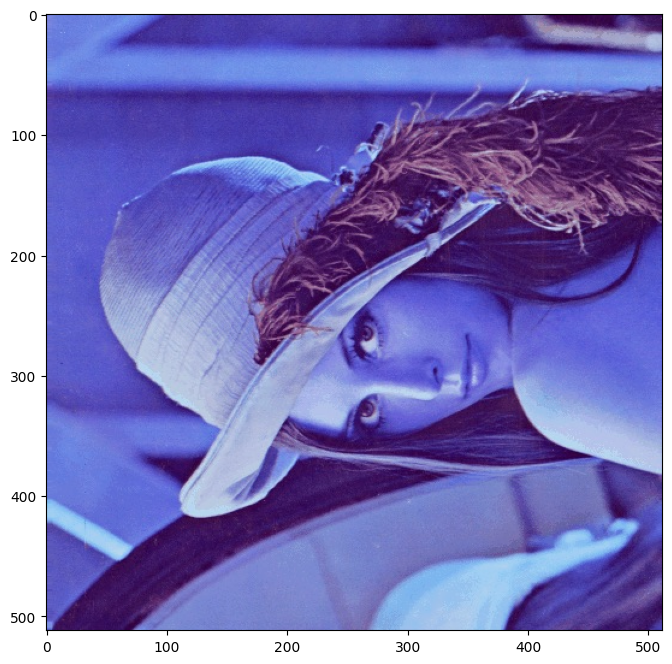

In [12]:
transposed=cv2.transpose(input_image)
plt.imshow(transposed)

## Arithmetic operations on images

OpenCV has a lot of functions for doing mathematics on images. Some of these have "analogous" numpy alternatives, but it is nearly always better to use the OpenCV version. The reason for this that OpenCV is designed to work on images and so handles memory better.

Useful arithmetic operations include add and addWeighted, which combine two images that are the same size.

---

## Operazioni aritmetiche sulle immagini
OpenCV ha molte funzioni per eseguire operazioni matematiche sulle immagini. Alcune di queste hanno alternative simili in numpy, ma è quasi sempre meglio usare la versione di OpenCV.
Il motivo è che OpenCV è progettato per lavorare con immagini e quindi gestisce meglio la memoria.

Le operazioni aritmetiche utili includono add e addWeighted, che combinano due immagini della stessa dimensione.

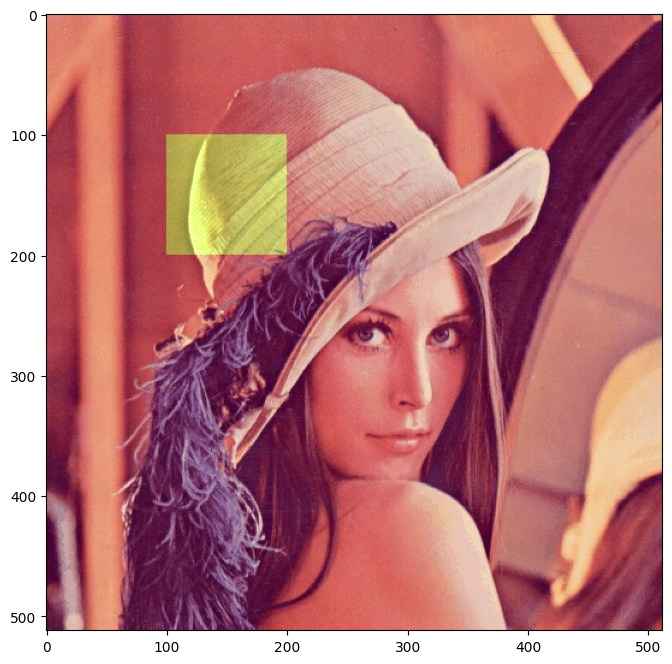

In [13]:
#First create an image the same size as our input
blank_image = np.zeros((input_image.shape), np.uint8)

blank_image[100:200,100:200,1]=100; #give it a green square

new_image=cv2.add(blank_image,input_image) # add the two images together

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

## Noise reduction
Noise reduction usually involves blurring/smoothing an image using a Gaussian kernel.
The width of the kernel determines the amount of smoothing.

---

## Riduzione del rumore
La riduzione del rumore di solito comporta il blurring (sfocatura) o la smoothing (levigatura) di un'immagine usando un kernel gaussiano.
La larghezza del kernel determina il livello di levigatura.

### ?.3.3 Exercise
Try changing the value d in the code below. What do you see?

---

Prova a cambiare il valore di d nel codice qui sotto.
Cosa noti?



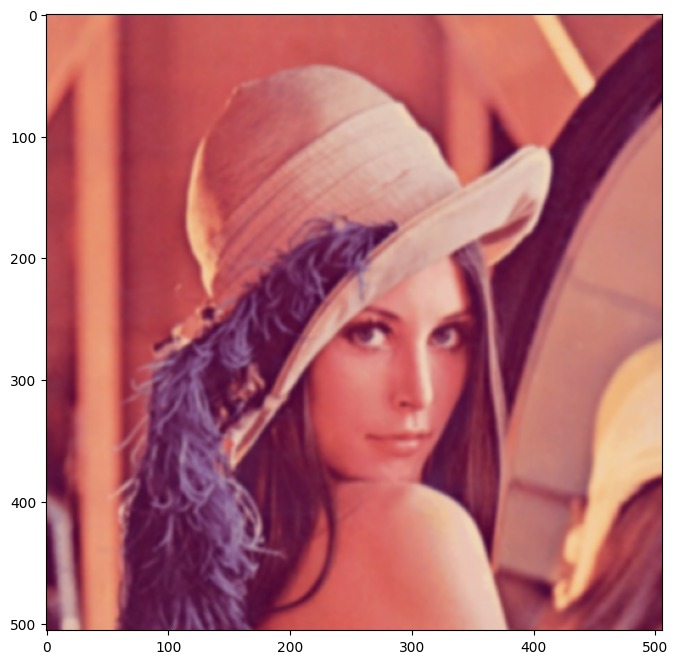

In [14]:
d=3
img_blur3 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur3, cv2.COLOR_BGR2RGB))

## Edges

Edge detection is the final image processing technique we're going to look at in this tutorial.

For a lot of what we think of as "modern" computer vision techniques, edge detection functions as a building block. Much edge detection actually works by **convolution**, and indeed **convolutional neural networks** are absolutely the flavour of the month in some parts of computer vision. Sobel's edge detector was one of the first truly successful edge detection (enhancement) technique and that involves convolution at its core. You can read more about the background to Sobel here in the OpenCV docs [here](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html).

---

## Bordi
Il rilevamento dei bordi è l'ultima tecnica di elaborazione delle immagini che vedremo in questo tutorial.

Per molte delle tecniche di visione artificiale "moderne", il rilevamento dei bordi funziona come un blocco di base. Gran parte del rilevamento dei bordi si basa sulla convoluzione e, infatti, le reti neurali convoluzionali (CNN) sono molto popolari in alcune aree della visione artificiale.

Il rilevatore di bordi di Sobel è stata una delle prime tecniche di rilevamento (e miglioramento) dei bordi ad avere davvero successo, e si basa proprio sulla convoluzione.
Puoi leggere di più sul rilevatore di Sobel nella documentazione di OpenCV

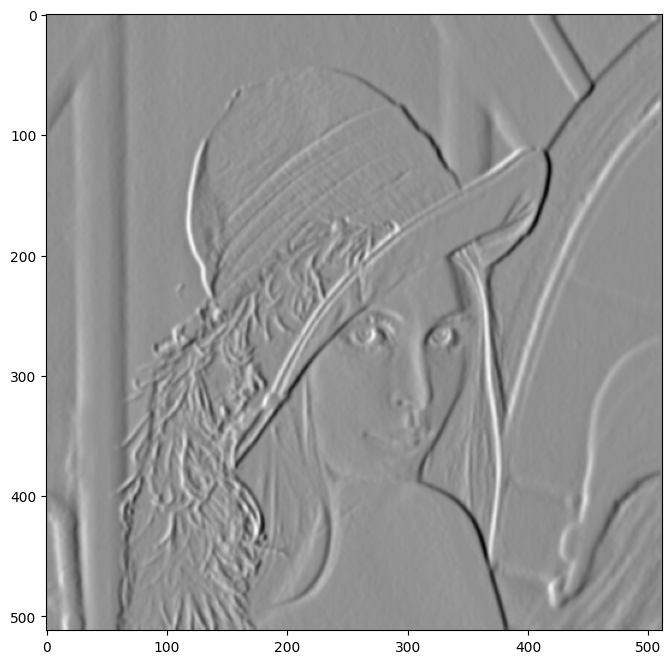

In [15]:
sobelimage=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(sobelimage,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(sobelimage,cv2.CV_64F,0,1,ksize=9)
plt.imshow(sobelx,cmap = 'gray')
# Sobel works in x and in y, change sobelx to sobely in the olt line above to see the difference

## 2.1 Kaggle
Kaggle is an important source of data and algorithms. Let's see if we can find some cool image dataset we like!

---

Kaggle è una fonte importante di dati e algorithms.
Vediamo se riusciamo a trovare qualche dataset di immagini interessante!